# ADA - Unsupervised learning

In [12]:
import random
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

%matplotlib inline

# Part A) Tutorial

In this tutorial, you will learn how to discover clusters in data using Python.

Let's start by creating some **[synthetic](https://en.wikipedia.org/wiki/Synthetic_data)** data!
First, we create a super secret number that represents the number of the cluster to generate. 

Don't print it! We'll try to discover it automatically.

## K-Means

In [13]:
random.seed(42)
top_secret_number = random.randint(2, 10) # random.randint(a, b) : 从指定的整数范围 [a, b]（闭区间）中随机生成一个整数。

Now we can generate some data distributed in n groups:

In [14]:
total_samples = 100

# make_blobs 是 sklearn.datasets 提供的一个方法，用于生成人工聚类数据。
# n_samples=total_samples：指定要生成的样本数量。
# centers=top_secret_number：指定生成聚类的数量。
# cluster_std=2：每个聚类的标准差。值越大，聚类点的分布越散。
# n_features=2：每个样本有 2 个特征（即生成二维数据点）。
# return_centers=True：返回聚类的中心点坐标（centers）。
# random_state=42：固定随机种子，保证生成的数据可重复。

# X: 生成的样本数据点，形状为 (n_samples, n_features)
# _: 每个数据点所属的聚类标签，表示每个点被分配到了哪个聚类中心, 形状为 (n_samples,)。
# 代码中用 _ 忽略了这个值，因为聚类标签在这里不需要使用，只关注数据点 X 和聚类中心 centers。
# centers: 生成的聚类中心的坐标, 形状为 (n_centers, n_features)。n_centers 是聚类中心的数量; n_features 是每个中心点的特征数

# This create some artifical clusters with standard dev. = 2
X, _, centers = make_blobs(n_samples=total_samples, 
                           centers=top_secret_number, 
                           cluster_std=2,
                           n_features=2,
                           return_centers=True, 
                           random_state=42)

# X[:3]: 返回数据点 X 的前 3 行
X[:3]

array([[-8.57321463, -9.90980404],
       [ 6.26691327, -0.48855895],
       [-3.44814639, 10.09940622]])

Let's see how these clusters look like and where is their center:

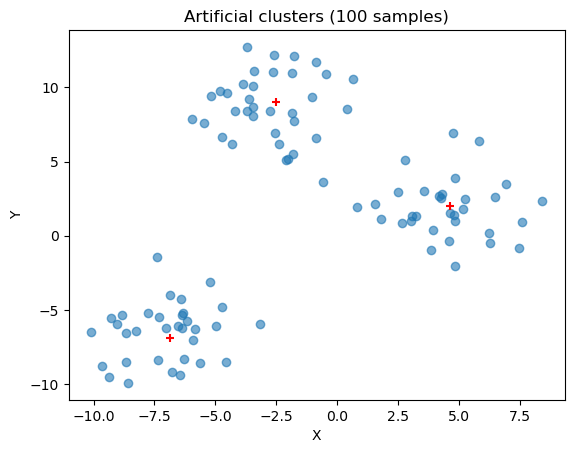

In [15]:
plt.scatter(X[:,0], X[:,1], alpha=0.6)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Artificial clusters (%s samples)" % total_samples)

for c in centers:
    plt.scatter(c[0], c[1], marker="+", color="red")

plt.show()

### Clustering the data
How many clusters do you see? Probably easy for a human, but not so trivial for a computer. 

Let's try to group the data with K-Means. Recall that K-Means requires you to specify the number of clusters (K). Let's start by testing multiple values between 2 and 10:

d:\Users\uji_crush\anaconda3\envs\ada\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Users\uji_crush\anaconda3\envs\ada\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Users\uji_crush\anaconda3\envs\ada\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Users\uji_crush\anaconda3\envs\ada\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to ha

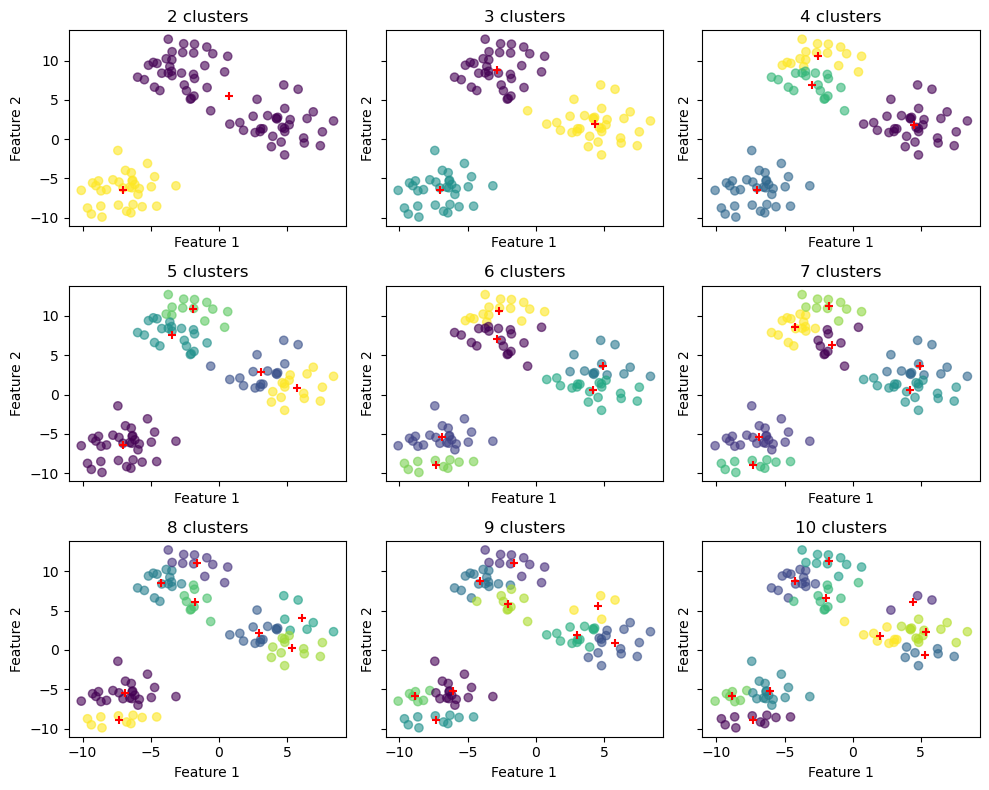

In [16]:
MIN_CLUSTERS = 2
MAX_CLUSTERS = 10

# Compute number of row and columns
COLUMNS = 3
ROWS = math.ceil((MAX_CLUSTERS-MIN_CLUSTERS)/COLUMNS)
fig, axs = plt.subplots(ROWS, COLUMNS, figsize=(10,8), sharey=True, sharex=True)

# Plot the clusters
for n_clusters in range(MIN_CLUSTERS, MAX_CLUSTERS+1):
    current_column = (n_clusters-MIN_CLUSTERS)%COLUMNS
    # //: 整除运算符, 表示两个数相除并向下取整
    current_row = (n_clusters-MIN_CLUSTERS)//COLUMNS
    # Get the axis where to add the plot
    ax = axs[current_row, current_column]
    # Cluster the data with the current number of clusters
    kmean = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    # 聚类结果存储在 kmean 对象中
    # kmean.labels_：每个数据点的聚类标签（类别编号），值的范围是 [0, n_clusters-1]。
    # kmean.cluster_centers_：每个聚类中心的坐标。

    # Plot the data by using the labels as color
    # c=kmean.labels_：颜色参数，表示每个点的颜色由其聚类标签决定。
    # 例如：标签 0 的点为一种颜色。标签 1 的点为另一种颜色。
    ax.scatter(X[:,0], X[:,1], c=kmean.labels_, alpha=0.6)
    ax.set_title("%s clusters"%n_clusters)
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    
    # Plot the centroids
    for c in kmean.cluster_centers_:
        ax.scatter(c[0], c[1], marker="+", color="red")

plt.tight_layout()
plt.show()

### Bonus example: 
Did you know you can animate your plots?

In [17]:
from matplotlib.animation import FuncAnimation
fig, ax = plt.subplots()


X_3clusters, _, centers = make_blobs(n_samples=100, 
                           centers=3, 
                           cluster_std=2,
                           return_centers=True, 
                           random_state=99)

# Update frame callback 
# KMeans 的作用：对数据 X_3clusters 进行 K-Means 聚类，分为 3 个聚类。
# 参数解析：
# init="random"：聚类中心的初始化方式为随机初始化。
# algorithm="lloyd"：使用经典的 Lloyd 算法（K-Means 的标准实现）。
# random_state=10：设置随机种子，保证每次运行时结果一致。
# n_init=1：设置初始化次数为 1，表示算法只随机初始化一次。
# .fit(X_3clusters)：对数据 X_3clusters 执行聚类。
def update(max_iter):
    # Clean the plot
    plt.clf()
    plt.cla()
    # Cluster and get the labels
    kmeans = KMeans(n_clusters=3, 
                    init="random", 
                    algorithm="lloyd",
                    random_state=10, 
                    n_init=1, max_iter=max_iter).fit(X_3clusters)
    # Plot
    plt.scatter(X_3clusters[:,0], X_3clusters[:,1], c=kmeans.labels_, alpha=0.6)
    for c in kmeans.cluster_centers_:
        plt.scatter(c[0], c[1], marker="+", color="red")
    plt.title("%s iterations" % max_iter)

# Animate 1 frame per second
# update：动画中每一帧要调用的函数。每次更新时，update 函数会被调用，并传入 frames 参数中的一个值。
# frames=np.arange(1, 20)：指定动画的帧数。frames 是一个可迭代对象，这里使用 np.arange(1, 20)，表示帧数从 1 到 19（共 19 帧）。
# 在每一帧中，update 函数会被调用，并将当前的帧数（即 1 到 19）作为参数传入。
# interval=500：每帧之间的时间间隔（单位：毫秒）。这里是 500ms（即 0.5 秒），表示动画每秒显示 2 帧（帧率为 2 FPS）。
anim = FuncAnimation(fig, update, frames=np.arange(1, 20), interval=500)

# Save the gif
anim.save('clusters.gif', dpi=80)

MovieWriter ffmpeg unavailable; using Pillow instead.
d:\Users\uji_crush\anaconda3\envs\ada\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Users\uji_crush\anaconda3\envs\ada\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Users\uji_crush\anaconda3\envs\ada\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Users\uji_crush\anaconda3\envs\ada\Lib\s

### How to select K in K-Means?

You have a couple of options:
- Silhouette score: Find the K with the desired tradeoff between the number of clusters and cohesion/separation.
- Elbow method: Find the "elbow" in the curve of the Sum of Squared Errors

Let's see what we can observe using these 2 methods.

#### Silhouette score

To generate the curve of the silhouette score, we cluster the data with different value of K and plot the resulting values.

d:\Users\uji_crush\anaconda3\envs\ada\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Users\uji_crush\anaconda3\envs\ada\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Users\uji_crush\anaconda3\envs\ada\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Users\uji_crush\anaconda3\envs\ada\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to ha

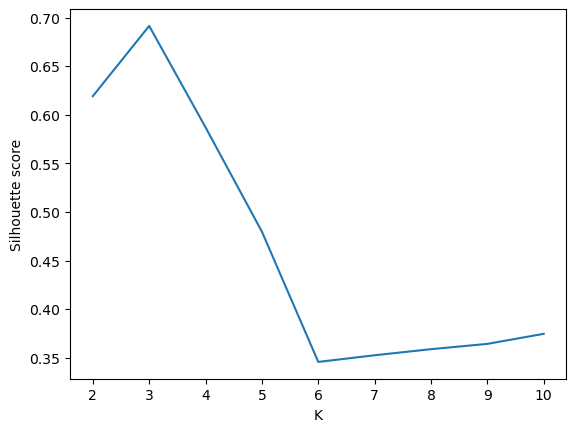

In [19]:
silhouettes = []

# Try multiple k
for k in range(2, 11):
    # Cluster the data and assigne the labels
    labels = KMeans(n_clusters=k, random_state=10).fit_predict(X) 
    #当你只需要聚类标签（即每个数据点属于哪个聚类）时，可以直接使用 fit_predict(X)，而不用使用fit(X)后再访问 kmeans.labels_
    # Get the Silhouette score
    score = silhouette_score(X, labels)
    silhouettes.append({"k": k, "score": score})
    
# Convert to dataframe
silhouettes = pd.DataFrame(silhouettes)

# Plot the data
plt.plot(silhouettes.k, silhouettes.score)
plt.xlabel("K")
plt.ylabel("Silhouette score")
plt.show()

#### Elbow method

Similarly to the previous case, we compute the SSE for different values of K, and we plot the distribution:

d:\Users\uji_crush\anaconda3\envs\ada\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Users\uji_crush\anaconda3\envs\ada\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Users\uji_crush\anaconda3\envs\ada\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Users\uji_crush\anaconda3\envs\ada\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to ha

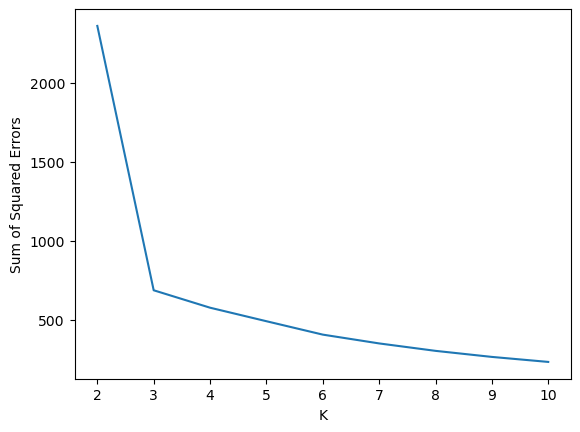

In [20]:
def plot_sse(features_X, start=2, end=11):
    sse = []
    for k in range(start, end):
        # Assign the labels to the clusters
        kmeans = KMeans(n_clusters=k, random_state=10).fit(features_X)
        sse.append({"k": k, "sse": kmeans.inertia_})

    sse = pd.DataFrame(sse)
    # Plot the data
    plt.plot(sse.k, sse.sse)
    plt.xlabel("K")
    plt.ylabel("Sum of Squared Errors")
    plt.show()
    
plot_sse(X)

In this case, we get the same recommendation from both methods: K=3. Silhouette suggests that using 3 clusters is a fair tradeoff between the number of groups and their separation. The elbow method shows how the SSE reduction is less significant with more than 3 clusters.

Let's plot the best clusters:

d:\Users\uji_crush\anaconda3\envs\ada\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Users\uji_crush\anaconda3\envs\ada\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


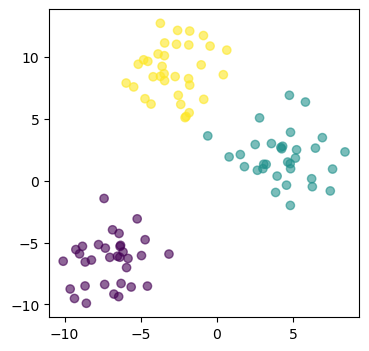

In [21]:
fig, axs = plt.subplots(1, 1, figsize=(4,4), sharey=True)

# Plot the clusters with K = 3
labels = KMeans(n_clusters=3, random_state=0).fit_predict(X)
axs.scatter(X[:,0], X[:,1], c=labels, alpha=0.6)
plt.show()

Ultimately it is up to you (domain expert!) to pick the number of clusters that better represent the data.

The best representation, in this case, is obtained with k = 3.

-----

### Visualizing high dimensional data

Visualizing 2-dimensional data is easy, but what happens when we have more than three features? 

We can use dimensionality reduction techniques! Let start by generating some artifical clusters with 10 features. 
We use the same number of samples and groups as the previous example:

In [22]:
total_samples = 100

# This create some artifical clusters with standard dev. = 3
X10d, _ = make_blobs(n_samples=total_samples, 
                           centers=top_secret_number, 
                           cluster_std=3,
                           n_features=10,
                           random_state=0)

print("The features of the first sample are: %s" % X10d[0])

The features of the first sample are: [ 7.05933272  4.20962197 -2.77357361  6.59147131 -6.64440614  9.47625342
 -3.01996723  7.36384861  1.41157528  1.28459274]


To transform this features vector in a form that can be represented in a simple plot, we can reduce the number of dimensions by preserving as much information as possible. Let's see two techniques that can help in this task:

- t-SNE
- PCA


Note: the next lecture will cover more theoretical aspects of these methods.

主要参数：

n_components=2: 指定降维后的目标维度为 2。这里是将 10 维数据 X10d 降维到 2 维，以便于可视化（可以绘制 2D 散点图）。

init='random': 指定低维空间中数据点的初始分布方式。取值：'random'：点在低维空间中随机初始化。'pca'：点根据 PCA 的结果初始化。这里使用随机初始化。

learning_rate='auto': 学习率，决定了优化的步长。'auto' 会自动选择一个合适的学习率，通常是 max(N/12, 200)（N 是样本数）。

random_state=0: 设置随机种子，用于保证结果的可重复性。如果每次运行代码都想得到相同的结果，可以设置 random_state。

In [23]:
X_reduced_tsne = TSNE(n_components=2, init='random', learning_rate='auto', random_state=0).fit_transform(X10d)

print("The features of the first sample are: %s" % X_reduced_tsne[0])

The features of the first sample are: [ 3.2180345 -1.7569892]


In [24]:
X_reduced_pca = PCA(n_components=2).fit(X10d).transform(X10d)

print("The features of the first sample are: %s" % X_reduced_pca[0])

The features of the first sample are: [-6.17922102  7.01618025]


The features are reduced in both cases to a 2d space. Please note that they are not the same because the two techniques optimize different objectives.

PCA: 

全称：主成分分析（Principal Component Analysis）。

目标：寻找数据中方差最大的方向（主成分方向）。保持数据的整体结构，并用较少的维度尽可能解释原始数据的方差。

降维方式：将数据投影到主成分方向上。主成分是数据的线性组合。输出结果是保持数据全局结构的低维表示。

应用场景：适用于需要保留数据全局线性结构的场景。常用于解释性分析、特征选择等任务。

t-SNE 的原理

全称：t-分布随机邻居嵌入（t-distributed Stochastic Neighbor Embedding）。

目标：保留高维空间中点对之间的局部关系（局部相似性）。在降维后的空间中，确保原始相似的点尽可能靠近，不相似的点尽可能远离。

降维方式：高维空间中的相似性用概率分布表示（基于点对间的高斯距离）。低维空间中的相似性用 t-分布表示，并通过优化（最小化 KL 散度）使高维和低维的相似性尽可能一致。t-SNE 是一种非线性降维方法，输出的结果不能直接与原始空间线性映射。

应用场景：适用于数据的可视化，尤其是非线性分布的数据。常用于揭示数据中的局部模式，比如聚类、簇之间的关系。

d:\Users\uji_crush\anaconda3\envs\ada\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Users\uji_crush\anaconda3\envs\ada\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


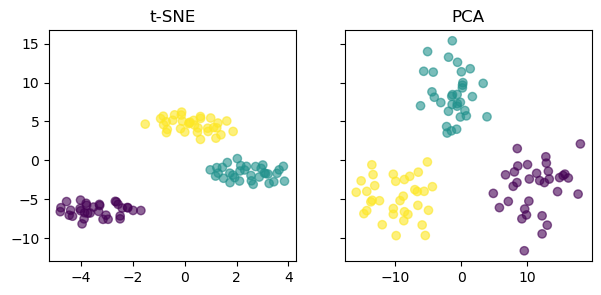

In [25]:
fig, axs = plt.subplots(1, 2, figsize=(7,3), sharey=True)

# Cluster the data in 3 groups
labels = KMeans(n_clusters=3, random_state=0).fit_predict(X10d)

# Plot the data reduced in 2d space with t-SNE
axs[0].scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=labels, alpha=0.6)
axs[0].set_title("t-SNE")

# Plot the data reduced in 2d space with PCA
axs[1].scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=labels, alpha=0.6)
axs[1].set_title("PCA")

plt.show()

### Density based: DBSCAN

K-Means is an intuitive and effective algorithm, but what happens when the data has a complex shape?

As for the previous example, let's generate some synthetic data that resemble two half-moons.

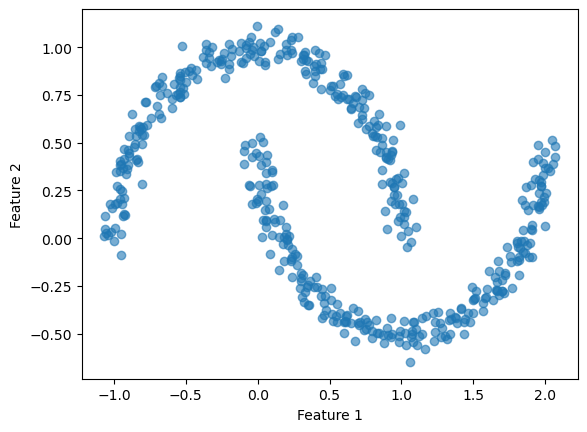

In [26]:
# Create 500 random points with 2-moons shape
X_moons, _ = make_moons(500, noise=0.05, random_state=0)

plt.scatter(X_moons[:,0], X_moons[:,1], alpha=0.6)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

We can visually see that there are two groups. Let's assign the labels with K-Means!

d:\Users\uji_crush\anaconda3\envs\ada\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Users\uji_crush\anaconda3\envs\ada\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


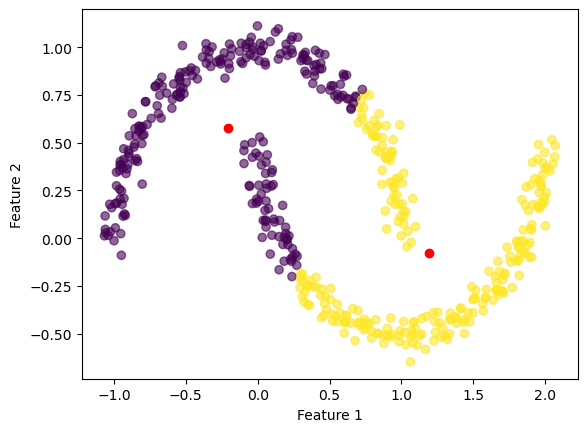

In [27]:
kmean = KMeans(n_clusters=2, random_state=0).fit(X_moons)
plt.scatter(X_moons[:,0], X_moons[:,1], c=kmean.labels_, alpha=0.6)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Plot the centroids
for c in kmean.cluster_centers_:
    plt.scatter(c[0], c[1], marker="o", color="red")

plt.show()

Let's cluster the data with DBSCAN by variating the `eps` value in the range between 0.05 and 0.15.

密度的定义

ε（eps，半径）：定义一个点的“邻域”范围，即某个点周围的 ε 半径内的区域。用于判断哪些点属于一个密度范围。

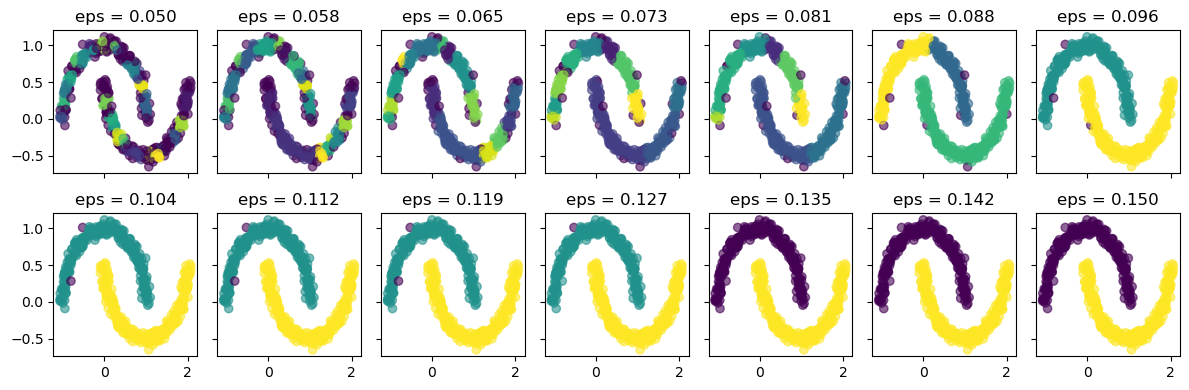

In [28]:
# Create a list of eps
eps_list = np.linspace(0.05, 0.15, 14)

# Compute number of row and columns
COLUMNS = 7
ROWS = math.ceil(len(eps_list)/COLUMNS)

fig, axs = plt.subplots(ROWS, COLUMNS, figsize=(12, 4), sharey=True, sharex=True)

for i in range(0, len(eps_list)):
    eps = eps_list[i]
    
    current_column = i%COLUMNS
    current_row = i//COLUMNS
    
    ax = axs[current_row, current_column]
    labels = DBSCAN(eps=eps).fit_predict(X_moons)
    ax.scatter(X_moons[:,0], X_moons[:,1], c=labels, alpha=0.6)
    ax.set_title("eps = {:.3f}".format(eps))
    
plt.tight_layout()
plt.show()

-------
# Part B: Exercises

## Exercise 1. Real world data! Wheat has a kernel too!


<img src="img/wheat_banner.png" width="800">

Data Set Information:

> The examined group comprised kernels belonging to three different varieties of wheat: Kama, Rosa and Canadian, 70 elements each, randomly selected for
the experiment. High quality visualization of the internal kernel structure was detected using a soft X-ray technique. It is non-destructive and considerably cheaper than other more sophisticated imaging techniques like scanning microscopy or laser technology. The images were recorded on 13x18 cm X-ray KODAK plates. Studies were conducted using combine harvested wheat grain originating from experimental fields, explored at the Institute of Agrophysics of the Polish Academy of Sciences in Lublin.

Source: https://archive.ics.uci.edu/ml/datasets/seeds



In [29]:
seeds = pd.read_csv("seeds_dataset.csv")
seeds.head()

,ID,area,perimeter,compactness,lengthOfKernel,widthOfKernel,asymmetryCoefficient,lengthOfKernelGroove,seedType
0,1,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,2,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,3,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,4,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,5,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In this exercise, we are interested in discovering structure in the data by hiding the actual label provided in the dataset.

### Question 1.1: Prepare the dataset

- Create a dataset by keeping only the meaningful features. Remove the type.
- Plot the histogram of the different features.
- The features have different scales, but we want to give the same importance to all them. Find a way to mitigate the problem.

In [30]:
seeds_features = seeds.drop("ID", axis=1).drop("seedType", axis=1)
seeds_features.head()

,area,perimeter,compactness,lengthOfKernel,widthOfKernel,asymmetryCoefficient,lengthOfKernelGroove
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


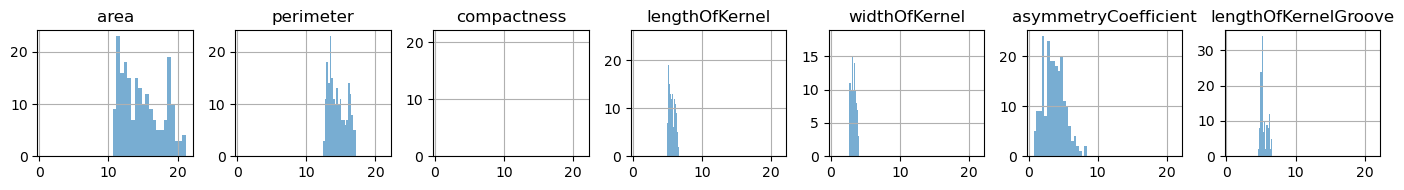

In [34]:
columns = seeds_features.columns

fig, axs = plt.subplots(1, len(columns), figsize=(14,2), sharex=True)

for columns_idx in range(0, len(columns)):
    seeds_features[columns[columns_idx]].hist(bins=20, ax=axs[columns_idx], alpha=0.6)
    axs[columns_idx].set_title(columns[columns_idx])

plt.tight_layout()
plt.show()

In [35]:
# 要对数据进行标准化，可以自己手动计算出mean和std进行标准化，也可以直接利用StandardScaler
# StandardScaler 是一个用于标准化的工具，它会根据数据的分布计算每个特征的均值和标准差，然后使用这些值对数据进行标准化。
# fit(seeds_features)：计算输入数据 seeds_features 中每个特征的均值（μ）和标准差（σ）。这些值会存储在 StandardScaler 对象中，以便后续使用
# transform(seeds_features) 使用之前计算的均值和标准差，将输入数据 seeds_features 转换为标准化后的数据。
# 标准化后的每个特征的值遵循标准正态分布（均值为 0，标准差为 1）。
# fit_transform(): 就是前面两者的简写
scaled_features = StandardScaler().fit_transform(seeds_features)
print("Scaled sample: %s" %scaled_features[0])

Scaled sample: [ 1.42097769e-01  2.15462437e-01  6.06017918e-05  3.04218199e-01
  1.41701823e-01 -9.86151745e-01 -3.83577423e-01]


### Question 1.2: Cluster the data with K-Means

- Use the Elbow method to find the best value of K

d:\Users\uji_crush\anaconda3\envs\ada\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Users\uji_crush\anaconda3\envs\ada\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Users\uji_crush\anaconda3\envs\ada\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Users\uji_crush\anaconda3\envs\ada\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to ha

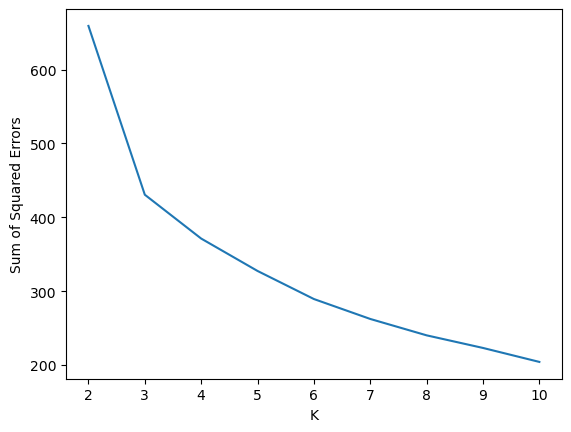

In [36]:
plot_sse(scaled_features)

### Question 1.3: Visualise your clusters

- Use t-SNE to plot your clusters
- Compare side by side 2 plots using the original labels (seedType) and the ones generated by K-Means.

In [37]:
X_reduced_tsne = TSNE(n_components=2, learning_rate='auto', init='random', random_state=0).fit_transform(seeds_features)

d:\Users\uji_crush\anaconda3\envs\ada\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Users\uji_crush\anaconda3\envs\ada\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


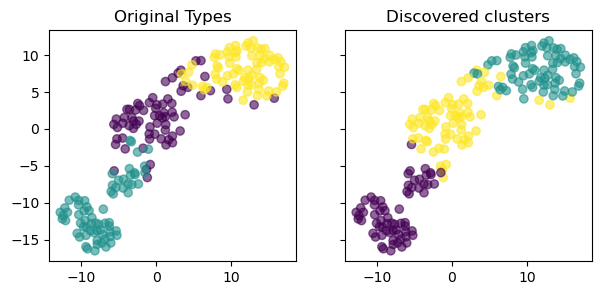

In [38]:
fig, axs = plt.subplots(1,2, figsize=(7,3), sharey=True)

axs[0].scatter(X_reduced_tsne[:, 0], X_reduced_tsne[:, 1], c=seeds.seedType, alpha=0.6)
axs[0].set_title("Original Types")

labels = KMeans(n_clusters=3, random_state=0).fit_predict(scaled_features)

axs[1].scatter(X_reduced_tsne[:, 0], X_reduced_tsne[:, 1], c=labels, alpha=0.6)
axs[1].set_title("Discovered clusters")

plt.show()

# Exercise 2. Real world data! More examples with Wine

> These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

Source: https://archive.ics.uci.edu/ml/datasets/wine

### Question 2.1: Assign the wine to its group

In this dataset the label is missing. Repeat the previous analysis to assign the wine to its original group.

- Select the reasonable number of clusters
- Plot the data

In [39]:
wine = pd.read_csv("wine-clustering.csv")
wine.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


d:\Users\uji_crush\anaconda3\envs\ada\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Users\uji_crush\anaconda3\envs\ada\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Users\uji_crush\anaconda3\envs\ada\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Users\uji_crush\anaconda3\envs\ada\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to ha

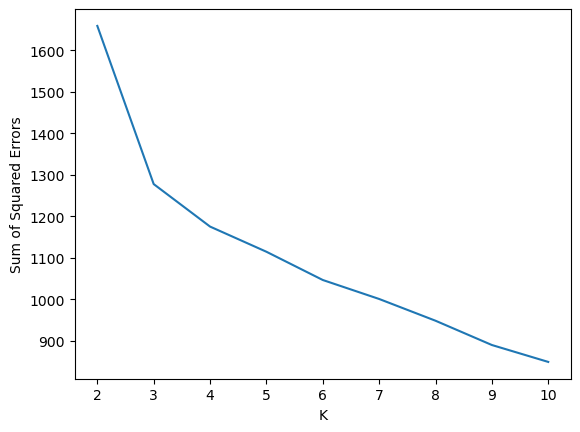

In [40]:
wine_scaled = StandardScaler().fit_transform(wine)
plot_sse(wine_scaled)

d:\Users\uji_crush\anaconda3\envs\ada\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Users\uji_crush\anaconda3\envs\ada\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


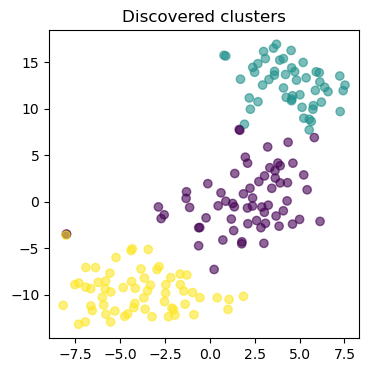

In [44]:
wine_scaled_reduced_tsne = TSNE(n_components=2, learning_rate='auto', init='random', random_state=0).fit_transform(wine_scaled)
labels = KMeans(n_clusters=3, random_state=0).fit_predict(wine_scaled)

fig, axs = plt.subplots(1,1,figsize=(4,4))

axs.scatter(wine_scaled_reduced_tsne[:,0], wine_scaled_reduced_tsne[:,1], c=labels, alpha=0.6)
axs.set_title("Discovered clusters")
plt.show()

d:\Users\uji_crush\anaconda3\envs\ada\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Users\uji_crush\anaconda3\envs\ada\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Users\uji_crush\anaconda3\envs\ada\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Users\uji_crush\anaconda3\envs\ada\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to ha

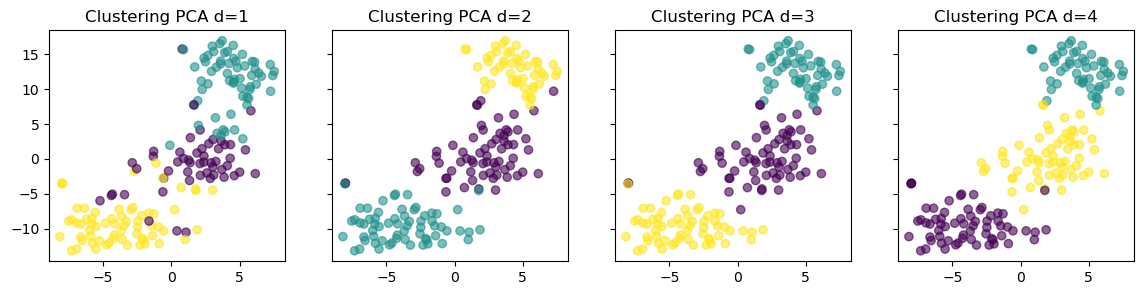

In [45]:
fig, axs = plt.subplots(1, 4, figsize=(14, 3), sharey=True)

for i in range(0, 4):
    X_reduced_pca = PCA(n_components=i+1).fit_transform(wine_scaled)
    labels = KMeans(n_clusters=3, random_state=0).fit_predict(X_reduced_pca)
    axs[i].scatter(wine_scaled_reduced_tsne[:,0], wine_scaled_reduced_tsne[:,1], c=labels, alpha=0.6)
    axs[i].set_title("Clustering PCA d=%s"% (i+1))
    
plt.show()

---------
# Part C: Quiz

### Question 1: Which of the following real-world ML applications is not unsupervised learning?
1. Netflix matrix factorization pipeline to discover users with similar interests
2. Speaker recognition (recognition of the identity of who is talking) in phones and smart assistant devices
3. LDA topic modeling on Twitter content to discover customers' opinions about a product
4. K-means clustering of Web domains 


In [46]:
# 无监督学习 是一种机器学习方法，模型在没有标签（ground truth）的情况下学习数据的隐藏结构或模式。
# 典型任务包括：
# 聚类（clustering）：如 K-means。
# 降维（dimensionality reduction）：如 PCA、t-SNE。
# 主题建模（topic modeling）：如 LDA。
# 关联规则学习（association learning）：如购物篮分析。
# 无监督学习的核心是：没有标注的标签，目标是根据数据的内在特性发现模式或结构。

# 有监督学习 是一种学习方法，模型基于有标签的数据进行训练，目标是从输入到标签的映射关系。
# 特点：数据包含输入 X 和对应的标签 y
# 常见任务：
# 分类（classification）：预测类别标签。
# 回归（regression）：预测连续值。

# 1：Netflix 的矩阵分解（Matrix Factorization）
# 应用场景：Netflix 使用矩阵分解来发现用户兴趣相似性，并为用户推荐内容。这是一个典型的无监督学习场景
# 因为它分析的是用户与电影之间的隐式关系，没有明确的标签。

# 2：语音识别中的说话人身份识别（Speaker Recognition）
# 应用场景：在手机或智能助手中，识别“是谁在说话”是一个有监督学习问题。
# 过程：使用训练数据（音频样本和对应的说话人身份标签）来训练模型。模型学会从音频特征中映射到身份标签（如“用户 A”、“用户 B”）。
# 有标签训练数据的参与使其成为有监督学习任务。
# 故此题选2；

# 3：LDA 主题建模
# 应用场景：LDA（Latent Dirichlet Allocation）是一种主题建模技术，常用于分析文本内容以发现隐藏主题。
# 过程：不需要标签。模型从文本中学习每个单词的潜在分布和文档的主题分布。这是一个典型的无监督学习任务。

# 4：Web 域名的 K-means 聚类
# 应用场景：K-means 是一种无监督聚类算法，用于根据特征（如域名访问量、内容特性等）将 Web 域名划分为多个组。
# 没有标签参与，只根据数据的特征相似性进行分组。

# 结论：选2.

### Question 2: Which of the following is true for the k-means clustering algorithm?

1. It always converges to a global optimum.
2. In each iteration, points are assigned to the closest centroid and the new centroids are recomputed.
3. It outputs the optimal number of clusters.
4. None of the above.

In [47]:
# 1：k-means 算法通过迭代优化目标函数（簇内平方误差，SSE），最终会收敛到一个局部最优解。
# 然而，k-means 的结果依赖于初始聚类中心的选择。如果初始中心选择不当，可能会陷入局部最优，而非全局最优。
# 错误，因为 k-means 只保证局部收敛，不能保证全局最优。

# 2：这是 k-means 的核心步骤：每次迭代时，数据点根据到所有聚类中心的距离被分配到最近的中心（基于欧几里得距离）。
# 重新计算每个簇中所有点的均值，作为新的聚类中心。这两步会交替执行，直到算法收敛。
# 正确，这是 k-means 的标准操作流程。

# 3：k-means 本身需要预先指定聚类数 k，算法不会自动确定 k 的值。
# 选择最优聚类数通常需要借助其他方法（如肘部法则、轮廓系数等）来分析不同 k 值对应的聚类效果。
# 错误，k-means 不会自动输出最优簇数。

# 结论：选2.